In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Wedge

from gym_guppy.tools.math import _ray_casting_walls, ray_casting_walls, compute_dist_bins

You need to install `mxnet` to use MXNetGuppy, you can use `pip install mxnet`


In [2]:
robot_orientation = np.deg2rad(121)
robot_pose = np.array([25, -30, robot_orientation])
# world_bounds = np.array([[0, 0], [100, 100]], dtype=np.float32)
world_bounds = np.array([[-50, -50], [50, 50]], dtype=np.float32)
diagonal = np.linalg.norm(world_bounds[0] - world_bounds[1])
ray_orientations = np.linspace(-np.deg2rad(135), np.deg2rad(135), 54, dtype=np.float32)

fish_poses = np.array([[25, 25, np.deg2rad(20)],
                      [5, -20, np.deg2rad(20)],
                      [15, -35, np.deg2rad(20)]])
ray_sectors = np.linspace(-np.deg2rad(137.5), np.deg2rad(137.5), 54+1, dtype=np.float32)

In [4]:
rc_w = np.nanmin(_ray_casting_walls(robot_pose, world_bounds, ray_orientations), axis=1, keepdims=True)
rc_wi = ray_casting_walls(robot_pose, world_bounds, ray_orientations, diagonal)
%timeit _ray_casting_walls(robot_pose, world_bounds, ray_orientations)

30 µs ± 855 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [5]:
rc_a = compute_dist_bins(robot_pose, fish_poses, ray_sectors, diagonal)
%timeit compute_dist_bins(robot_pose, fish_poses, ray_sectors, diagonal)

3.38 µs ± 57.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


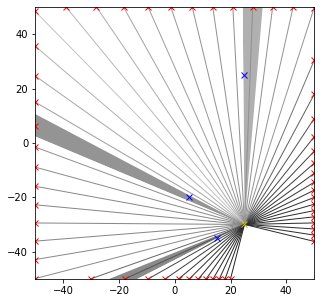

In [6]:
f = plt.figure(figsize=(5,5))
ax = f.add_subplot(111)
ax.set_xlim(-50, 50)
ax.set_ylim(-50, 50)

local_ray_sectors = np.rad2deg(ray_sectors + robot_orientation)
for r, w1, w2 in zip(rc_a, local_ray_sectors, np.roll(local_ray_sectors, -1)):
    ax.add_patch(Wedge(robot_pose[:2], diagonal, w1, w2, fc=f'{(1 - 0.5 * r):.2}'))

local_ray_orientations = ray_orientations.reshape((-1, 1)) + robot_orientation

ray_sin = np.sin(local_ray_orientations)
ray_cos = np.cos(local_ray_orientations)

ray_points = np.concatenate((ray_cos, ray_sin), axis=1)
ray_points *= rc_w
ray_points[:, 0] += robot_pose[0]
ray_points[:, 1] += robot_pose[1]

for r, i in zip(ray_points, rc_wi):
    r_0, r_1 = r[:2]
    ax.plot([robot_pose[0], r_0], [robot_pose[1], r_1], linewidth=1, color=f'{(1 - i):.2}')
    ax.plot(r_0, r_1, 'rx')

ax.plot(robot_pose[0], robot_pose[1], 'yx')
ax.plot(fish_poses[:, 0], fish_poses[:, 1], 'bx')

plt.show()
del ax
del f